In [3]:
# DETECTING UNDERFITTING VS OVERFITTING EXAMPLE
# BY USING THE LEARNING CURVE ( TRAINING VS CROSS_VALIDATION DATA)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

data = pd.read_csv('practice_data/data.csv')

X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

In [15]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2


def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    print(train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()


[ 8 17 26 35 44 53 62 71 80]


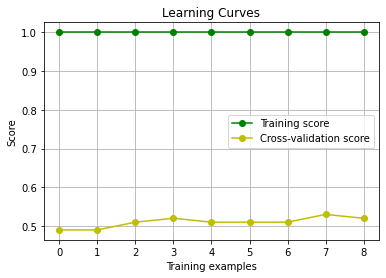

In [16]:
### Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

### Logistic Regression (underfitting)
#estimator = LogisticRegression()

### Decision Tree (perfect)
#estimator = GradientBoostingClassifier()

### Support Vector Machine (overfitting)
estimator = SVC(kernel='rbf', gamma=1000)

X2, y2 = randomize(X, y)

# the higher the score, the lower the error. So a high score is good
# the lower the score, the higher the error. So a low score is bad
draw_learning_curves(X2, y2, estimator, 9)